# Homework 5

Homework 5 exercises 8 and 9. This exercises required a Dataset told to be synthetically generated by the instructions of the task. In order to load the required dataset [*scikit-learn*](http://scikit-learn.org/stable/datasets/) will be used. The library provides a function to create artificial data to be used while studying machine learning problems. In this case the function *make_classification* allows the creation of data following the desired parameters which in this case will be used for the solution of the homework. The number of features is set to 2 so that the problem can be visualized.

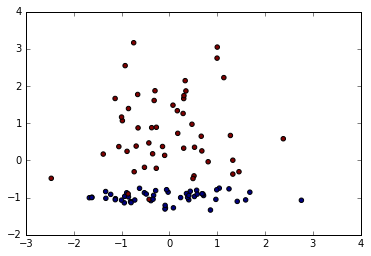

In [9]:
%matplotlib inline

import matplotlib.pyplot as pl
import numpy as np

from sklearn import linear_model, datasets
from random import randint

num_features = 2
learning_rate = 0.1
num_samples = 100
termination_threshold = 0.001

X1, Y1 = (datasets.make_classification(n_samples=num_samples, n_features=num_features, 
                                       n_redundant=0, n_informative=1,n_clusters_per_class=1) )
Y1[Y1 == 0] = -1

pl.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)

Defined draw function to plot a line in the current chart. (taken from [stackoverflow](http://stackoverflow.com/questions/9148927/matplotlib-extended-line-over-2-control-points))

In [10]:
def draw_line_2p(x,y,xlims):
    xrange = np.arange(xlims[0],xlims[1],0.1)
    A = np.vstack([x, np.ones(len(x))]).T
    k, b = np.linalg.lstsq(A, y)[0]
    pl.plot(xrange, k * xrange + b, color='m', linestyle='-', linewidth=2)

The instructions command to add a line with random coordinates to separate between classes. In this case it is not necessary because the generated data is already clustered and classified. In any case the procedure would be as follows. Remove comments to see generated line.

In [11]:
import random

x1 = random.uniform(0, 1)
x2 = random.uniform(0, 1)
y1 = random.uniform(0, 1)
y2 = random.uniform(0, 1)

#pl.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)
#draw_line_2p([x1, x2], [y1, y2], [np.amin(X1[:, 0]), np.amax(X1[:, 0])])

Definition of the gradient function for logistic regression

In [12]:
def gradient(w, row_idx):
    global X1, Y1
    # minus the dot product of Y1_n and X1_n
    numerator = (-Y1[row_idx] * np.array(X1[row_idx]))
    # 1 + exp(Y1_n.w.X1_n)
    denominator = 1 + np.exp(Y1[row_idx] * np.dot(w,X1[row_idx]))
    #print("numerator: " + str(numerator))
    #print("denominator: " + str(denominator))
    return np.divide(np.array(numerator), np.array(denominator))

Definition of termination condition function. Takes into account the definition of the threshold defined as parameter for the exercise.

In [13]:
def terminate(w_t, w_t1, first_run):
    if(first_run):
        return False
    else:
        #if(loop_count % 1 == 0):
        #print("arrays:")
        #print(np.array(w_t))
        #print(np.array(w_t1))
        #print("norm")
        #print(np.linalg.norm(np.subtract(np.array(w_t), np.array(w_t1))))
        return (np.linalg.norm(np.subtract(np.array(w_t), np.array(w_t1)))) < termination_threshold
    

Definition of the error function

In [14]:
def error(w, row_idx):
    global X1, Y1
    return np.log(1 + np.exp(-Y1[row_idx] * np.dot(w,X1[row_idx])))

Definition of main function for logistic regression

In [15]:
def logistic_regression():
    global num_samples, learning_rate
    loop_count = 0
    sum_error = 0
    #Define weights as random to init the algorithm
    #w = np.zeros((num_features+1,1))
    #w_t = [np.random.randn(), np.random.randn()]
    w_t = [0.0, 0.0]
    w_t1 = w_t
    
    first_run = True
    
    while(not terminate(w_t, w_t1, first_run)):
        if(loop_count % num_samples == 0):
            permutation = np.random.permutation(num_samples)
        first_run = False
        w_t = w_t1
        idx = permutation[loop_count % num_samples]
        g = gradient(w_t,idx)
        w_t1 = np.subtract(w_t,np.multiply(learning_rate, g))
        #w_t1 = np.add(w_t,np.multiply(learning_rate, g))
        sum_error += error(w_t1, idx)
        loop_count = loop_count + 1
    #print("loops: "+str(loop_count))
    return (sum_error/loop_count, loop_count)

Main call to the process to obtain final results

In [16]:
#Define random permutation to go through in the algorithm
sum_error = 0
sum_iterations = 0
for num in range(0, 100):
    result = logistic_regression()
    sum_error += result[0]
    sum_iterations += result[1]
print("Out of sample average error: " + str(sum_error/100))
print("Average iterations ran: " + str(sum_iterations/100))

Out of sample average error: 0.347798240801
Average iterations ran: 145.25
